In [ ]:
import os
import numpy as np
import py_entitymatching as em

import pandas as pd
# For further instructions on building non-neural matchers, please see the following link:
# http://anhaidgroup.github.io/py_entitymatching/v0.3.3/user_manual/matching.html#ml-matchers





for task in [

 'abt_buy',

 ]:
    
    datasets_dir = task


    for model in ['SVM', 'DecisionTree', 'RF', 'LogReg', 'LinReg', 'NB']:
    
    
        path_A = datasets_dir + os.sep  + '/tableA.csv'
        path_B = datasets_dir + os.sep  + '/tableB.csv'
        path_train = datasets_dir + os.sep  + '/train.csv'
        path_test = datasets_dir + os.sep  + '/test.csv'

        A = em.read_csv_metadata(path_A, key='id')
        B = em.read_csv_metadata(path_B, key='id')
        try:
            tmp = pd.read_csv(path_train)
            tmp['id']
        except:
            tmp['id'] = range(len(tmp))
            path_train =  path_train.replace('.csv','__.csv')
            
            tmp.rename(columns={'ltable_id': 'left_id', 'rtable_id': 'right_id'}, inplace=True)


            tmp.to_csv(path_train , index = False)

            tmp = pd.read_csv(path_test)
            tmp['id'] = range(len(tmp))
            path_test =  path_test.replace('.csv','__.csv')
            tmp.rename(columns={'ltable_id': 'left_id', 'rtable_id': 'right_id'}, inplace=True)

            tmp.to_csv(path_test, index = False)






        I = em.read_csv_metadata(path_train, key='id',
                                ltable=A, rtable=B,
                                fk_ltable='left_id', fk_rtable='right_id')

        J = em.read_csv_metadata(path_test, key='id',
                                ltable=A, rtable=B,
                                fk_ltable='left_id', fk_rtable='right_id')

        # Create a set of ML-matchers
        if model == 'SVM':
            model_ = em.SVMMatcher(name='SVM', random_state=0, probability=True)
        elif model == 'DecisionTree':
            model_ = em.DTMatcher(name='DecisionTree', random_state=0)
        elif model == 'RF':
            model_ = em.RFMatcher(name='RF', random_state=0)
        elif model == 'LogReg':
            model_ = em.LogRegMatcher(name='LogReg', random_state=0, max_iter=1000)
        elif model == 'LinReg':
            model_ = em.LinRegMatcher(name='LinReg')
        elif model == 'NB':
            model_ = em.NBMatcher(name='NB')


        atypes1 = em.get_attr_types(A)
        atypes2 = em.get_attr_types(B)

        block_c = em.get_attr_corres(A, B)
        tok = em.get_tokenizers_for_blocking()
        sim = em.get_sim_funs_for_blocking()
        F = em.get_features(A, B, atypes1, atypes2, block_c, tok, sim)


        H = em.extract_feature_vecs(I,
                                    feature_table=F,
                                    attrs_after='label',
                                    show_progress=True)

        H = em.impute_table(H, missing_val=np.nan)

        model_.fit(table=H,
                exclude_attrs=['id', 'left_id', 'right_id', 'label'],
                target_attr='label')

        L = em.extract_feature_vecs(J, feature_table=F,
                                    attrs_after='label', show_progress=True)

        L = em.impute_table(L, missing_val=np.nan)
        
        predictions = model_.predict(table=L, exclude_attrs=['id', 'left_id', 'right_id', 'label'],
                                    append=True, target_attr='preds', inplace=False, return_probs=True,
                                    probs_attr='proba')

        proba = np.array(predictions['proba'])
        
        label = L['label']
        col_left = []
        col_right = []
        df_right = pd.read_csv(path_A)
        df_left = pd.read_csv(path_A)
        for i,left in enumerate(list(L['left_id'])):
            right = list(L['right_id'])[i]

            left_ent = df_right[df_right['id'] ==right]
            right_ent = df_left[df_left['id'] ==left]

            if task == 'DBLP-GoogleScholar':
                key = 'journal'
            else:
                key = sens_dict[task][0] 
            
            t1 = str(list(left_ent[key])).replace('[','').replace(']','').replace('\'','').replace('`','').replace('\"','').strip()
            t2= str(list(right_ent[key])).replace('[','').replace(']','').replace('\'','').replace('`','').replace('\"','').strip()

            col_left.append(t1)
            col_right.append(t2)
            
        df = pd.DataFrame({'left':col_left, 'right':col_right, 'label': label, 'score':proba})


        df.to_csv('SCORES/score_'+model+'_'+task+'.csv', index = False)
        print(model, task)



In [ ]:
import os
import numpy as np
import py_entitymatching as em

# For further instructions on building non-neural matchers, please see the following link:
# http://anhaidgroup.github.io/py_entitymatching/v0.3.3/user_manual/matching.html#ml-matchers

datasets = ['abt_buy']
datasets_dir = 'data/'



for task in ['abt_buy']: pass
    
datasets_dir = task






for model in ['dt', 'rf', 'ln', 'lg', 'nb', 'svm']:
    for dataset in datasets:
        path_A = datasets_dir + os.sep + dataset + '/tableA.csv'
        path_B = datasets_dir + os.sep + dataset + '/tableB.csv'
        path_train = datasets_dir + os.sep + dataset + '/train.csv'
        path_test = datasets_dir + os.sep + dataset + '/test.csv'

        A = em.read_csv_metadata(path_A, key='id')
        B = em.read_csv_metadata(path_B, key='id')

        I = em.read_csv_metadata(path_train, key='id',
                                 ltable=A, rtable=B,
                                 fk_ltable='left_id', fk_rtable='right_id')

        J = em.read_csv_metadata(path_test, key='id',
                                 ltable=A, rtable=B,
                                 fk_ltable='left_id', fk_rtable='right_id')

        # Create a set of ML-matchers
        if model == 'svm':
            model_ = em.SVMMatcher(name='SVM', random_state=0, probability=True)
        elif model == 'dt':
            model_ = em.DTMatcher(name='DecisionTree', random_state=0)
        elif model == 'rf':
            model_ = em.RFMatcher(name='RF', random_state=0)
        elif model == 'lg':
            model_ = em.LogRegMatcher(name='LogReg', random_state=0, max_iter=1000)
        elif model == 'ln':
            model_ = em.LinRegMatcher(name='LinReg')
        elif model == 'nb':
            model_ = em.NBMatcher(name='NB')

        atypes1 = em.get_attr_types(A)
        atypes2 = em.get_attr_types(B)

        block_c = em.get_attr_corres(A, B)
        tok = em.get_tokenizers_for_blocking()
        sim = em.get_sim_funs_for_blocking()
        F = em.get_features(A, B, atypes1, atypes2, block_c, tok, sim)


        print(F.feature_name)

        H = em.extract_feature_vecs(pd.read_csv('abt_buy/test.csv'),
                                    feature_table=F,
                                    attrs_after='label',
                                    show_progress=True)

        H = em.impute_table(H, missing_val=np.nan)

        model_.fit(table=H,
                   exclude_attrs=['id', 'left_id', 'right_id', 'label'],
                   target_attr='label')

        L = em.extract_feature_vecs(J, feature_table=F,
                                    attrs_after='label', show_progress=True)

        L = em.impute_table(L, missing_val=np.nan)

        predictions = model_.predict(table=L, exclude_attrs=['id', 'left_id', 'right_id', 'label'],
                                     append=True, target_attr='preds', inplace=False, return_probs=True,
                                     probs_attr='proba')

        print(predictions[['id', 'left_id', 'right_id', 'preds']])
        predictions['preds'].to_csv(datasets_dir + os.sep + dataset + '/preds_' + model + '.csv', index=False)
        eval_result = em.eval_matches(predictions, 'label', 'preds')
        em.print_eval_summary(eval_result)

In [125]:

df1 = pd.read_csv('abt_buy/train.csv')
df2 = pd.read_csv('abt_buy/valid.csv')

df = pd.concat([df1,df2],axis=0)
df.reset_index(drop=True, inplace=True)



left_names = []
right_names = []
non_names = []

for row in list(df.columns):
    if 'left' in row: 
        left_names.append(row)
    elif 'right' in row:
        right_names.append(row)
    else:
        non_names.append(row)

A = df[left_names]  
B = df[right_names]

A = A.rename(columns=lambda x: x.replace('left_', ''))
B = B.rename(columns=lambda x: x.replace('right_', ''))

A['id'] = range(len(A))
B['id'] = range(len(A),len(B)+len(A))

df['left_id'] = range(len(A))
df['right_id'] = range(len(A),len(B)+len(A))
df['id'] = range(len(df))


df.to_csv('train_tmp.csv', index=False)
A.to_csv('A_tmp.csv', index=False)
B.to_csv('B_tmp.csv', index=False)



A = em.read_csv_metadata('A_tmp.csv', key='id')
B = em.read_csv_metadata('B_tmp.csv', key='id')

atypes1 = em.get_attr_types(A)
atypes2 = em.get_attr_types(B)

block_c = em.get_attr_corres(A, B)
tok = em.get_tokenizers_for_blocking()
sim = em.get_sim_funs_for_blocking()
F = em.get_features(A, B, atypes1, atypes2, block_c, tok, sim)

# print(F.feature_name)

I = em.read_csv_metadata('train_tmp.csv', key='id',
                        ltable=A, rtable=B,
                        fk_ltable='left_id', fk_rtable='right_id')

H = em.extract_feature_vecs(I,
                            feature_table=F,
                            attrs_after='label',
                            show_progress=True)

H = em.impute_table(H, missing_val=np.nan)

Metadata file is not present in the given path; proceeding to read the csv file.
Metadata file is not present in the given path; proceeding to read the csv file.
Metadata file is not present in the given path; proceeding to read the csv file.
/opt/homebrew/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [126]:
model_ = em.DTMatcher(name='DecisionTree', random_state=0)


model_.fit(table=H,
                   exclude_attrs=['id', 'left_id', 'right_id', 'label'],
                   target_attr='label')


In [127]:

predictions = model_.predict(table=H, exclude_attrs=['id', 'left_id', 'right_id', 'label'],
                                append=True, target_attr='preds', inplace=False, return_probs=True,
                                probs_attr='proba')

In [123]:

df = pd.read_csv('abt_buy/test.csv')





left_names = []
right_names = []
non_names = []

for row in list(df.columns):
    if 'left' in row: 
        left_names.append(row)
    elif 'right' in row:
        right_names.append(row)
    else:
        non_names.append(row)

A = df[left_names]  
B = df[right_names]

A = A.rename(columns=lambda x: x.replace('left_', ''))
B = B.rename(columns=lambda x: x.replace('right_', ''))

A['id'] = range(len(A))
B['id'] = range(len(A),len(B)+len(A))

df['left_id'] = range(len(A))
df['right_id'] = range(len(A),len(B)+len(A))
df['id'] = range(len(df))


df.to_csv('test_tmp.csv', index=False)
A.to_csv('A_test_tmp.csv', index=False)
B.to_csv('B_test_tmp.csv', index=False)





A = em.read_csv_metadata('A_test_tmp.csv', key='id')
B = em.read_csv_metadata('B_test_tmp.csv', key='id')


atypes1 = em.get_attr_types(A)
atypes2 = em.get_attr_types(B)

block_c = em.get_attr_corres(A, B)
tok = em.get_tokenizers_for_blocking()
sim = em.get_sim_funs_for_blocking()
F = em.get_features(A, B, atypes1, atypes2, block_c, tok, sim)


J = em.read_csv_metadata('test_tmp.csv', key='id',
                                ltable=A, rtable=B,
                                fk_ltable='left_id', fk_rtable='right_id')

L = em.extract_feature_vecs(J, feature_table=F,
                                attrs_after='label', show_progress=True)

L = em.impute_table(L, missing_val=np.nan)

predictions = model_.predict(table=L, exclude_attrs=['id', 'left_id', 'right_id', 'label'],
                                append=True, target_attr='preds', inplace=False, return_probs=True,
                                probs_attr='proba')

Metadata file is not present in the given path; proceeding to read the csv file.
Metadata file is not present in the given path; proceeding to read the csv file.
Metadata file is not present in the given path; proceeding to read the csv file.


/opt/homebrew/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [203]:
id_train = pd.read_csv('tmp/train.csv')['ltable_id']
train = pd.read_csv('abt_buy/noisy_train.csv')



train['ltable_id'] = id_train
train = train.drop_duplicates(subset='ltable_id', keep='first')
train.drop(columns=['id','label'], inplace=True)
train

A = pd.read_csv('tmp/tableA.csv')
A.rename(columns={'id': 'id1'}, inplace=True)




,id1,name,description,price
0,0,sony turntable pslx350h,sony turntable pslx350h belt drive system 33-1/3 and 45 rpm speeds servo speed control supplied ...,NaN
1,1,bose acoustimass 5 series iii speaker system am53bk,bose acoustimass 5 series iii speaker system am53bk 2 dual cube speakers with two 2-1/2 ' wide-r...,399.0
2,2,sony switcher sbv40s,sony switcher sbv40s eliminates disconnecting and reconnecting cables compact design 4 a/v input...,49.0
3,3,sony 5 disc cd player cdpce375,sony 5 disc cd player - cdpce375 5 disc changer variable line output cd-r/rw playback capability...,NaN
4,4,bose 27028 161 bookshelf pair speakers in white 161wh,bose 161 bookshelf speakers in white 161wh articulated array speaker design high-excursion twidd...,158.0
...,...,...,...,...
1076,1076,logitech cordless desktop wave keyboard and mouse combo 920000264,logitech cordless desktop wave keyboard and mouse combo 920000264 contoured wave-shaped key desi...,79.0
1077,1077,mitsubishi dlp black tv stand mbs73v,mitsubishi dlp black tv stand mbs73v matching base for mitsubishi wd-73735 and wd-73736 dlp hdtv...,549.0
1078,1078,logitech digital precision pc gaming headset 981000040,logitech digital precision pc gaming headset 981000040 cushioned open-air design usb and analog ...,49.0
1079,1079,logitech 2.1 multimedia silver speaker system z2300,logitech 2.1 multimedia silver speaker system z2300 thx-certified 200 watts of rms power ( 400 w...,NaN


In [175]:
id_train

A = pd.read_csv('tmp/tableA.csv')
A['ltabel_id'] = A['id']

merge_df = A.merge(train[['ltabel_id', 'left_name']], on='ltabel_id', how='left')

merge_df = merge_df.drop_duplicates(subset='id', keep='first')
merge_df.drop(columns=['age'], inplace=True)

merge_df


,id,name,description,price,ltabel_id,left_name
0,0,sony turntable pslx350h,sony turntable pslx350h belt drive system 33-1/3 and 45 rpm speeds servo speed control supplied ...,NaN,0,sony 8 ' black lcd digital photo frame dpfd80
1,1,bose acoustimass 5 series iii speaker system am53bk,bose acoustimass 5 series iii speaker system am53bk 2 dual cube speakers with two 2-1/2 ' wide-r...,399.0,1,sharp over the counter microwave oven r1214ss
3,2,sony switcher sbv40s,sony switcher sbv40s eliminates disconnecting and reconnecting cables compact design 4 a/v input...,49.0,2,weber 3758301 blue genesis ep-320 lp gas grill 3758301
4,3,sony 5 disc cd player cdpce375,sony 5 disc cd player - cdpce375 5 disc changer variable line output cd-r/rw playback capability...,NaN,3,sony 32 ' bravia xbr series black lcd flat panel hdtv kdl32xbr6
16,4,bose 27028 161 bookshelf pair speakers in white 161wh,bose 161 bookshelf speakers in white 161wh articulated array speaker design high-excursion twidd...,158.0,4,sanus 15 ' 40 ' flat panel tv black wall mount vm400b
...,...,...,...,...,...,...
7689,1076,logitech cordless desktop wave keyboard and mouse combo 920000264,logitech cordless desktop wave keyboard and mouse combo 920000264 contoured wave-shaped key desi...,79.0,1076,speck seethru purple hard shell case for 15 ' macbook mb15purseev2
7696,1077,mitsubishi dlp black tv stand mbs73v,mitsubishi dlp black tv stand mbs73v matching base for mitsubishi wd-73735 and wd-73736 dlp hdtv...,549.0,1077,toshiba black dvd recorder with built-in digital tuner dr560
7700,1078,logitech digital precision pc gaming headset 981000040,logitech digital precision pc gaming headset 981000040 cushioned open-air design usb and analog ...,49.0,1078,panasonic dect 6.0 expandable digital cordless phone with all-digital answering system kxtg9341t
7701,1079,logitech 2.1 multimedia silver speaker system z2300,logitech 2.1 multimedia silver speaker system z2300 thx-certified 200 watts of rms power ( 400 w...,NaN,1079,panasonic plain paper fax/copier with cordless phone answering system grey finish kxfg2451


In [46]:
import numpy as np
import pandas as pd

clean = list(pd.read_csv('Data/noisy test/abt_buy/test.csv')['left_description'])
dirty  = list(pd.read_csv('Data/noisy test/abt_buy/noisy_test_20_1.csv')['left_description'])
# dirty  = list(pd.read_csv('Data/noisy train/abt_buy/noisy_train.csv')['left_description'])


cnt= 0
for i in range(len(dirty)):
    if dirty[i] != clean[i]:
        cnt+=1

cnt / len(dirty)





0.9780793319415448

In [66]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, train_test_split


df1 = pd.read_csv('Data/noisy train/abt_buy/train.csv')
df2 = pd.read_csv('Data/noisy train/abt_buy/valid.csv')
df3 = pd.read_csv('Data/noisy test/abt_buy/test.csv')

clean = pd.concat([df1, df2, df3], ignore_index=True)
clean['id'] = range(len(clean))



df1_ = pd.read_csv('Data/noisy train/abt_buy/noisy_train.csv')
df2_ = pd.read_csv('Data/noisy train/abt_buy/noisy_valid.csv')
df3_ = pd.read_csv('Data/noisy test/abt_buy/noisy_test_100.csv')

dirty = pd.concat([df1_, df2_, df3_], ignore_index=True)
dirty['id'] = range(len(dirty))
dirty.drop(columns=['label','id'], inplace=True)



for col in dirty.columns:
    clean[col + '_noisy']=dirty[col] 





df = clean.copy()
X = df.drop(columns=['label'], inplace=False)
y = df['label']

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_temp = X.iloc[train_index], X.iloc[test_index]
    y_train, y_temp = y.iloc[train_index], y.iloc[test_index]
    
    X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42, shuffle=True)
    
    train = pd.concat([y_train,X_train], axis=1)
    valid = pd.concat([y_val,X_val], axis=1)

    for col in train.columns:
        if 'noisy' in col:
            train.drop(columns=[col], inplace=True)
            valid.drop(columns=[col], inplace=True)


    TEST = pd.concat([y_test,X_test], axis=1)
    filtered_columns = [col for col in TEST.columns if col.startswith('left_') and not col.endswith('noisy')]
    new_columns = [col[5:] for col in filtered_columns]  


    if not os.path.exists('abt_buy_fold'): os.makedirs('abt_buy_fold')
    if not os.path.exists('abt_buy_fold/'+str(fold+1)): os.makedirs('abt_buy_fold/'+str(fold+1))

    train.to_csv('abt_buy_fold/'+str(fold+1)+'/train.csv', index=False)
    valid.to_csv('abt_buy_fold/'+str(fold+1)+'/valid.csv', index=False)

    for frac in [0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
        num_rows = int(frac* len(TEST))
        for i in range(10):
            test = TEST.copy()
            random_indices = np.random.choice(test.index, num_rows, replace=False)
            for row in new_columns:
                test.loc[random_indices, 'left_'+row] = test.loc[random_indices, 'left_'+row+'_noisy']
                test.loc[random_indices, 'right_'+row] = test.loc[random_indices, 'right_'+row+'_noisy']

                test.drop(columns=['left_'+row+'_noisy'], inplace=True)
                test.drop(columns=['right_'+row+'_noisy'], inplace=True)

            (train, valid, test)
            frac2 = str(int(frac*100))
            if len(frac2) == 1: frac2 = frac2 +'0'

            test.to_csv('abt_buy_fold/'+str(fold+1)+'/test_'+frac2+'_'+str(i+1)+'.csv', index=False)



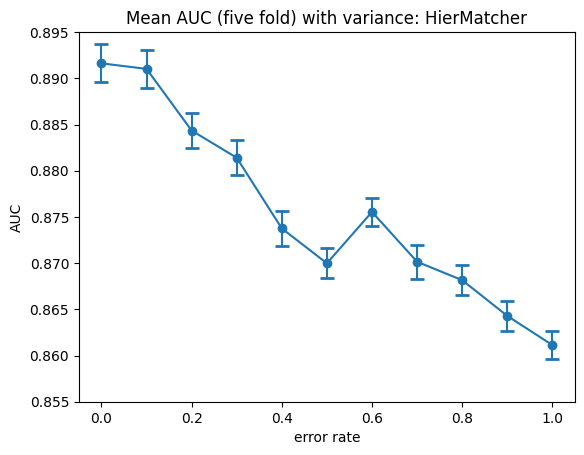

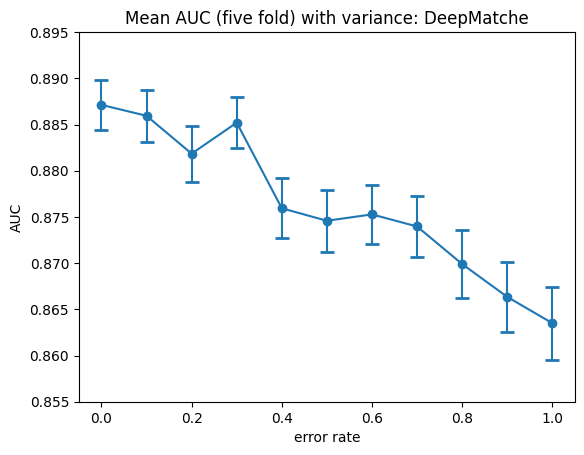

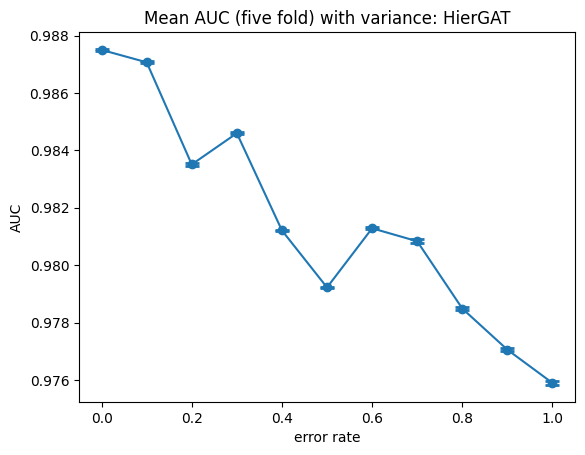

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve


for name in ['HierMatcher','DeepMatche','HierGAT']:

    AUC = []
    for frac in [0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
        frac = str(int(frac*100))
        if len(frac) == 1: frac = frac +'0'
        AUC.append([])
        
        for fold in [1,2,3,4,5]:
            df = pd.read_csv('tmp/'+name+'_score_abt_buy_fold_'+str(fold)+'_'+frac+'.csv')
            y_true = df[df.columns[1]]
            y_score = df[df.columns[0]]
            if name == 'HierGAT':
                y_true = df[df.columns[0]]
                y_score = df[df.columns[1]]
            auc_ = roc_auc_score(y_true, y_score)
            AUC[-1].append(auc_)


    AUC = np.array(AUC)
    # y_true = all_y
    # y_score = all_probs
    # auc = roc_auc_score(y_true, y_score)

    # print(np.max(np.mean(AUC, axis=1)))
    # print(np.min(np.mean(AUC, axis=1)))

    FRAC = [0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    plt.errorbar(FRAC, np.mean(AUC, axis=1), yerr=(np.var(AUC, axis=1))**1, fmt='-o', capsize=5, capthick=2)
    plt.xlabel('error rate')
    plt.ylabel('AUC')
    plt.title('Mean AUC (five fold) with variance: '+ name)
    if name != 'HierGAT':
        plt.ylim([0.855,0.895])
    plt.savefig(name+'_abt_buy.pdf')
    plt.show()
    

0.8871265444989027 0.8635004828640119
0.8916230334954999 0.8611327675580667
0.9873071409814176 0.9754120833901598
0.9870105348947544 0.9596478751913826
0.9884531590413944 0.9686962504299965


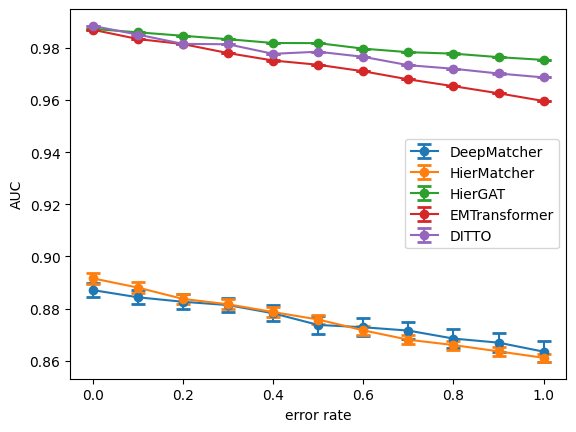

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve


for name in ['2DeepMatcher','2HierMatcher','2HierGAT', '2EMTransformer','2DITTO']:

    AUC = []
    for frac in [0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
        frac = str(int(frac*100))
        if len(frac) == 1: frac = frac +'0'
        AUC.append([])
        
        for fold in [1,2,3,4,5]:
            for rep in range(1,11):
                if name == '2EMTransformer' and fold not in [1,2,3]: continue
                if name == '2DITTO' and fold not in [1]: continue
                df = pd.read_csv('out/'+name+'_score_abt_buy_fold2_'+str(fold)+'_'+frac+'_'+str(rep)+'.csv')
                y_true = df[df.columns[1]]
                y_score = df[df.columns[0]]
                auc_ = roc_auc_score(y_true, y_score)
                AUC[-1].append(auc_)


    AUC = np.array(AUC)

    print(np.max(np.mean(AUC, axis=1)), np.min(np.mean(AUC, axis=1)))
    

    FRAC = [0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    plt.errorbar(FRAC, np.mean(AUC, axis=1), yerr=(np.var(AUC, axis=1))**1, fmt='-o', capsize=5, capthick=2, label=name.replace('2',''))
    plt.xlabel('error rate')
    plt.ylabel('AUC')
    # if name != 'HierGAT':
        # plt.ylim([0.855,0.895])
    # plt.savefig(name+'_abt_buy.pdf')
    # plt.show()
plt.legend()
plt.show()

41